# Serie A - Differenziale xG


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

from PIL import Image
import urllib
import os
import math

In [2]:
font_path = "assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("assets/stylesheets/soc_base.mplstyle")

## Leggere il dataframe

In [25]:
team_codes=dict(
    Juventus="9885",
    Salernitana="6480",
    Monza="6504",
    Bologna="9857",
    Salernitana_2="6480",
    Lazio="8543",
    Udinese="8600",
    Lecce="9888",
    Empoli="8534",
    Napoli="9875",
    Juventus_2="9885",
    Milan="8564",
    Atalanta="8524",
    Cremonese="7801",
    Inter="8636",
    Inter_2="8636",
    Fiorentina="8535",    
    Udinese_2="8600",
    Milan_2="8564",
    Torino="9804",
    Sampdoria="9882",
    Spezia="9881",
    HellasVerona="9876",
    Roma="8686",
    Sassuolo="7943"
)

team_codes
l = list(team_codes.values())


In [71]:
df = pd.read_csv('data/keepers_efficiency.csv', sep='\t').reset_index()
#df = df.sort_values(by='G-xG').reset_index(drop=True)
df = df[['Player', '90s', 'Squad', 'PSxG', 'PSxG+/-']]
df['team_id'] = list(team_codes.values())
df


,Player,90s,Squad,PSxG,PSxG+/-,team_id
0,Mattia Perin,10.5,Juventus,11.2,4.2,9885
1,Luigi Sepe,17.0,Salernitana,30.3,3.3,6480
2,Michele Di Gregorio,36.0,Monza,45.9,2.9,6504
3,Łukasz Skorupski,36.0,Bologna,46.6,2.6,9857
4,Guillermo Ochoa,19.0,Salernitana,33.4,2.4,6480
5,Ivan Provedel,36.9,Lazio,31.3,2.3,8543
6,Marco Silvestri,37.0,Udinese,46.9,1.9,8600
7,Wladimiro Falcone,37.0,Lecce,41.3,1.3,9888
8,Guglielmo Vicario,30.0,Empoli,38.2,1.2,8534
9,Alex Meret,33.0,Napoli,24.6,0.6,9875


In [72]:
df = df.assign(efficiency = lambda x: round(x["PSxG+/-"]/x["PSxG"]*100, 1)).sort_values(by="efficiency", ascending=True)
df = df.reset_index(drop=True)


In [73]:
df

,Player,90s,Squad,PSxG,PSxG+/-,team_id,efficiency
0,Andrea Consigli,35.0,Sassuolo,38.5,-14.5,7943,-37.7
1,Ciprian Tătărușanu,16.0,Milan,16.8,-4.2,8564,-25.0
2,Rui Patrício,35.0,Roma,27.6,-6.4,8686,-23.2
3,Juan Musso,23.1,Atalanta,21.7,-3.3,8600,-15.2
4,Emil Audero,25.0,Sampdoria,32.3,-4.7,9882,-14.6
5,Samir Handanović,13.0,Inter,14.9,-2.1,8636,-14.1
6,André Onana,24.0,Inter,19.3,-2.7,8636,-14.0
7,Lorenzo Montipò,36.0,Hellas Verona,46.9,-6.1,9876,-13.0
8,Vanja Milinković-Savić,37.0,Torino,35.5,-4.5,9804,-12.7
9,Bartłomiej Drągowski,32.7,Spezia,46.1,-4.9,9881,-10.6


## Visualizzazione

Bar chart orizzontale

<BarContainer object of 25 artists>

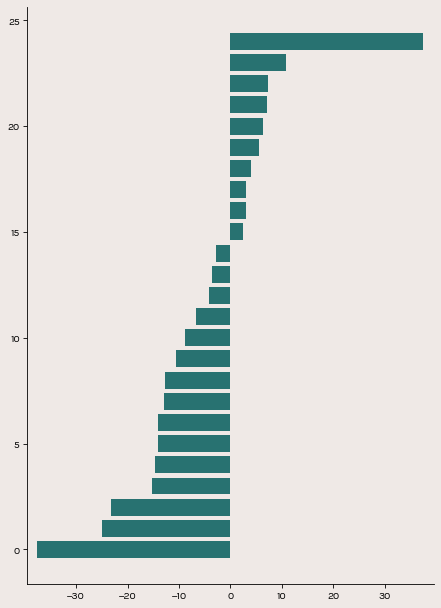

In [74]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['efficiency'].min()), df['efficiency'].max())
# Add 5% margin of that limit to the x-axis
max_ = max_*(1.05)
ax.set_xlim(-max_, max_)

ax.barh(df.index, df['efficiency'])

To make our viz more stylish, we perform the following steps:
* Rimuovo l'asse a lato.
* Aggiungo le gridlines.
* Linea in mezzo

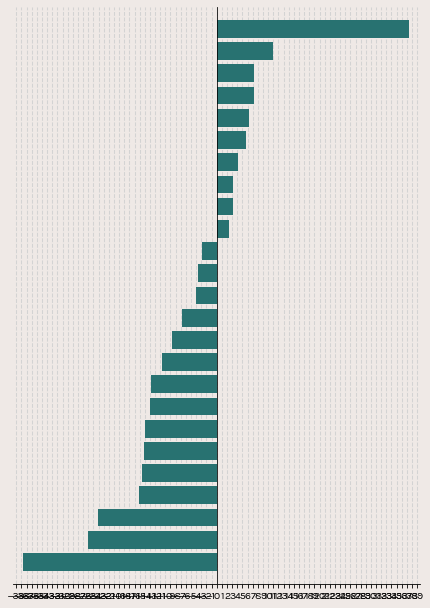

In [75]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['efficiency'].min()), df['efficiency'].max())
# Add 5% margin of that limit to the x-axis
max_ = max_*(1.05)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
# -- Bar Chart -------------------------------------
ax.barh(
    df.index, df['efficiency'],
    #hatch='//////', ec='#efe9e6',
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)

Ora, scriviamo il differenziale xG nel barchart.

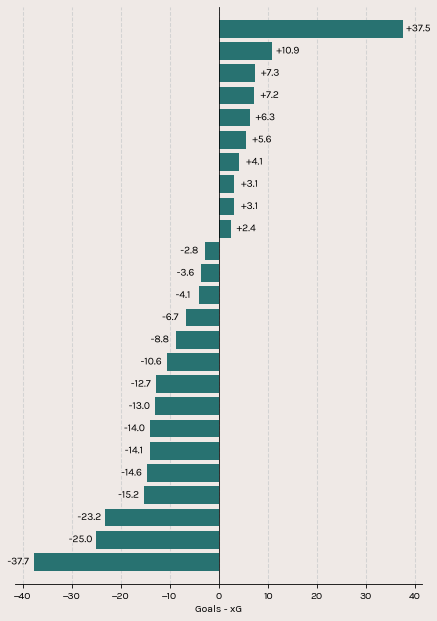

In [78]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
# -- Hatches --------------------------------------
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['efficiency'].min()), df['efficiency'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel('Goals - xG', size=10)
# -- Bar Chart -------------------------------------
ax.barh(
    df.index, df['efficiency'],
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
for index, x in enumerate(df['efficiency']):
    if x < 0:
        sign_offset = -1
        sign_text = ''
    else:
        sign_offset = 1
        sign_text = '+'
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

### Aggiungo i loghi

Aggiungo i loghi per estetica

In [10]:
# Codici dei loghi, inseriti nel CSV
team_logos = [
    8524, 9857, 7801, 8534,
    8535, 8636, 9885, 8543,
    9888, 8564, 6504, 9875,
    8686, 6480, 9882, 7943,
    9881, 9804, 8600, 9876
]

In [81]:
def add_logo_on_ax(ax, team_id, bw = False):
    '''
    This function adds the logo of a football team on a specific
    axes based on the Fotmob team ID.
    Args:
        - ax (object): the matplotlib axes object.
        - team_id (int): the Fotmob team ID.
        - bw (bool): whether to add the logo as black & white or with color.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{int(team_id):.0f}.png'))

    if bw:
        club_icon = club_icon.convert('LA')
    ax.imshow(club_icon)
    ax.axis("off")
    return ax

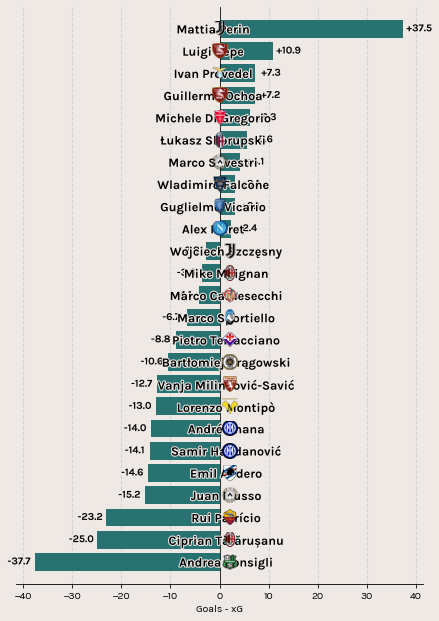

In [82]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['efficiency'].min()), df['efficiency'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel('Goals - xG', size=10)
# -- Bar Chart -------------------------------------
ax.barh(
    df.index, df['efficiency'],
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df['efficiency']):
    if x < 0:
        sign_offset = -1
        offset_logo = .55
        sign_text = ''
        offset_text = 4
    else:
        sign_offset = 1
        offset_logo = 1.45
        sign_text = '+'
        offset_text = -5
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points',
    )
    '''
    name = ax.annotate(
        xy=(x+5, index),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(-sign_offset*15,0),
        ha='center',
        va='center',
        textcoords='offset points'
    )
    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    '''
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    # -- Add the logo
    team_id = df['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id, False)

    name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.1),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='center',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )
    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

### Aggiungo un gradiente per le barre

In [83]:
'''
gradient = [
    '#de6f57',
    '#d5724d',
    '#cb7644',
    '#c0783e',
    '#b57b38',
    '#a97d35',
    '#9e7f34',
    '#928134',
    '#878137',
    '#7c823a',
    '#71823f',
    '#668244',
    '#5c814a',
    '#528050',
    '#497f56',
    '#407d5b',
    '#387b61',
    '#317966',
    '#2c776a',
    '#29756e',
    '#287271',
]

'''
gradient = [
'#cb0000',
'#da2908',
'#d75609',
'#d88300',
'#d2a900',
'#cbc000',
'#899f84',
'#02ac02',
'#029733',
'#00a589',
'#01a6c3',
'#1878cf',
'#146cf6'
]
soc_cm = mcolors.LinearSegmentedColormap.from_list('SOC', gradient, N=50)
cm.register_cmap(name='SOC', cmap=soc_cm)

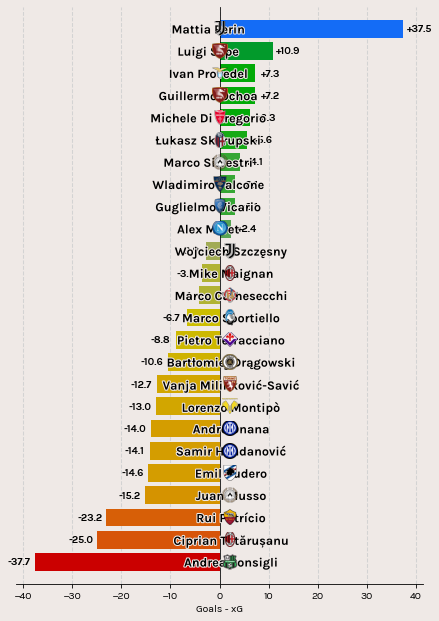

In [84]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
plt.rcParams['hatch.linewidth'] = 0.75
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['efficiency'].min()), df['efficiency'].max())
# Add 10% margin of the limit to the x-axis
max_ = max_*(1.1)
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel('Goals - xG', size=10)
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=df['efficiency'].min(),vmax=df['efficiency'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    df.index, df['efficiency'],
    color = cmap(norm(df['efficiency'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df['efficiency']):
    if x < 0:
        sign_offset = -1
        offset_logo = .55
        sign_text = ''
        offset_text = 5
    else:
        sign_offset = 1
        offset_logo = 1.45
        sign_text = '+'
        offset_text = -6
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*15,0),
        text=f'{sign_text}{x:.1f}',
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points',
    )
    # -- Add the logo
    team_id = df['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id)

    name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.1),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='center',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )
    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

### Aggiustamenti finali

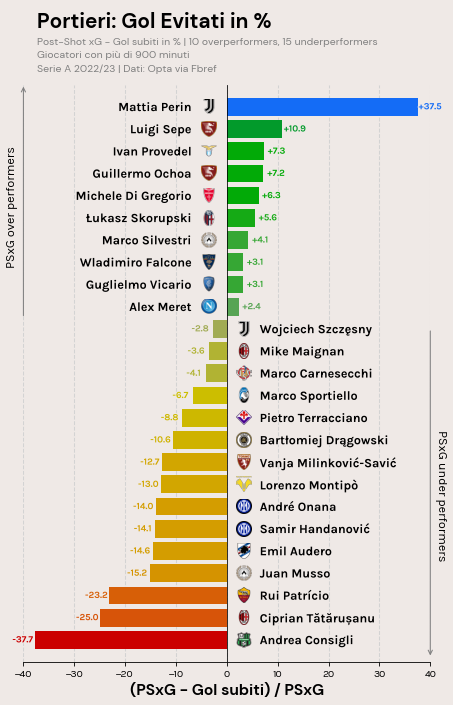

In [104]:
fig = plt.figure(figsize=(7,10), dpi=75)
ax = plt.subplot()
# -- Axes settings --------------------------------
ax.spines['left'].set_visible(False)
ax.grid(ls='--', lw=1, color='lightgrey', axis='x')
ax.yaxis.set_ticks([])
plt.rcParams['hatch.linewidth'] = 0.35
# -- Axes limits and tick positions ---------------
# Ensure symmetrical limits on the x-axis
max_ = max(abs(df['efficiency'].min()), df['efficiency'].max())
# Add 10% margin of the limit to the x-axis
max_ = 40
ax.set_xlim(-max_, max_)
ax.set_ylim(-1, df.shape[0])
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_xlabel('(PSxG - Gol subiti) / PSxG', fontsize = 15, color = "black", font = "DM Sans", weight = "bold")
# -- Bar Chart -------------------------------------
# Declare CMAP & Normalization
norm = mcolors.Normalize(vmin=df['efficiency'].min(),vmax=df['efficiency'].max())
cmap = plt.get_cmap('SOC')
ax.barh(
    df.index, df['efficiency'],
    color = cmap(norm(df['efficiency'])),
    zorder=3
)
ax.plot(
    [0,0],
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    color='black',
    lw=.75,
    zorder=3
)
# -- Annotations -----------------------------------
# -- Transforms for the placement of the logo ax ---
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for index, x in enumerate(df['efficiency']):
    if x < 0:
        sign_offset = -1
        offset_logo = 1.7
        sign_text = ''
        offset_text = 9
    else:
        sign_offset = 1
        offset_logo = 5
        sign_text = '+'
        offset_text = -10.5
    text_ = ax.annotate(
        xy=(x, index),
        xytext=(sign_offset*12,0),
        text=f'{sign_text}{x:.1f}',
        color= cmap(norm(x)),
        size=9,
        weight='bold',
        ha='center',
        va='center',
        textcoords='offset points'
    )
    text_.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])
    # -- Add the logo
    team_id = df['team_id'].iloc[index]
    ax_coords = DC_to_NFC([sign_offset*(-1)*offset_logo, index - 0.5])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.03, 0.03], anchor = "C")
    add_logo_on_ax(logo_ax, team_id)

    if x < 0:
        name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.08),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='left',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )
    else:
        name = ax.annotate(
        xy=(ax_coords[0]+offset_text, index-0.08),
        text=f'{df.iloc[index]["Player"]}' ,
        xytext=(sign_offset*15,0),
        ha='right',
        va='center',
        textcoords='offset points',
        fontsize = 12, color = "black", font = "Karla", weight = "bold"
    )

    
    name.set_path_effects([
        path_effects.Stroke(
            linewidth=2, 
            foreground='#efe9e6'
        ), 
        path_effects.Normal()
    ])

# -- Figure title and arrows --------------------------------
position_negative = df[df['efficiency'] < 0].index.max()
position_x_negative = -max_#math.floor(-max_*(.85))
position_x_positive = max_ #math.ceil(max_*(.85))
ax.annotate(
    xy=(position_x_negative,position_negative + .5),
    xytext=(position_x_negative,ax.get_ylim()[1]),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
ax.annotate(
    xy=(position_x_positive,position_negative),
    xytext=(position_x_positive,ax.get_ylim()[0] + .2),
    text='',
    arrowprops=dict(arrowstyle='<-',color='gray')
)
mid_point_positive = (position_negative + ax.get_ylim()[1])/2
mid_point_negative = (position_negative + ax.get_ylim()[0])/2
ax.annotate(
    xy=(position_x_negative,mid_point_positive),
    text='PSxG over performers',
    rotation=90,
    xytext=(-10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)
ax.annotate(
    xy=(position_x_positive,mid_point_negative),
    text='PSxG under performers',
    rotation=-90,
    xytext=(10,0),
    textcoords='offset points',
    ha='center',
    va='center',
    size=12
)

fig_text(
    x = 0.15, y = .95, 
    s = 'Portieri: Gol Evitati in %',
    va = 'bottom', ha = 'left',
    fontsize = 20, color = 'black', fontname="DM Sans", weight = 'bold'
)

fig_text(
    x = 0.15, y = 0.895, 
    s = 'Post-Shot xG - Gol subiti in % | 10 overperformers, 15 underperformers\nGiocatori con più di 900 minuti\nSerie A 2022/23 | Dati: Opta via Fbref',
    va = 'bottom', ha = 'left',
    fontsize = 10, font = 'DM Sans', color = 'gray'
)

plt.savefig(
	"figures/SerieA_Players_Goalkeepers.png",
	dpi = 600,
	facecolor = "#EFE9E6",
	bbox_inches="tight",
    edgecolor="none",
	transparent = False
)

plt.savefig(
	"figures/SerieA_Players_Goalkeepers_tr.png",
	dpi = 600,
	facecolor = "none",
	bbox_inches="tight",
    edgecolor="none",
	transparent = True
)